<a href="https://colab.research.google.com/github/zainof/GIT716.ET/blob/PartialCoding/WaPOR_ET_Look.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


How to GDAL on Colab

https://github.com/acgeospatial/Satellite_Imagery_Python/blob/master/Colaboratory_GDAL.ipynb 


Example pepared for APIs https://drive.google.com/open?id=1FZKO_PgeSYNlDKqXYakmpxs6uCXxqzXb



# pyWAPOR Toolbox

This jupyter notebook explains the functions and possibilities of the pyWAPOR toolbox. The toolbox is developed based on the equations mentioned within the  WaPOR Data Manual. The toolbox has 3 phases, namely:

1. Collect functions to download the in the WaPOR data manual described datasets automatically from the server. 
2. Processing functions to process and calculate the input datasets for ETLook model
3. ETLook model

While the output of the ET maps from the WaPOR ET dataset is dekadal, this toolbox calculates the ET on a daily basis. No interpolations methods in time are appied to remove "no data values" within the MODIS products like clouds. The ET value of a corresponding "no data value" will also be a "no data value". This will result in gaps within the ET maps.

The different phases of the toolbox will be shown one by one within this jupyter notebook

## 1. Collect Tools

With the collect tools, all the Level 1 datasets that are described in the WaPOR Data Manual can be downloaded automatically by using the collect tools. The tools already convert the format and projection to Tiff and WGS84. The collect tools can collect datasets from:

1.   CHIRPS
2.   GEOS
3.   Globcover
4.   MCD43
5.   MERRA
6.   MOD11
7.   MOD13
8.   MSGCPP
9.   MYD11
10. MYD13
11. SRTM
12. WAPOR

How to run the collect tools is shown one by one within this chapter. But before we start we will install the pyWAPOR module, which is available from the pypi library and therefor can be installed by using the pip command. To install run the following command:



In [ ]:
!pip install pyWAPOR==1.0.0

    100% |████████████████████████████████| 153kB 9.9MB/s 
    100% |████████████████████████████████| 4.0MB 7.5MB/s 
    100% |████████████████████████████████| 10.1MB 3.4MB/s 
    100% |████████████████████████████████| 307kB 26.0MB/s 
fastai 1.0.51 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0


Before using the toolbox, import the toolbox to make the functions available.

In [ ]:
import pyWAPOR

### 1.0 NASA Account

To collect all the MODIS products and the MERRA2 datasets, an NASA user account is required. To create a NASA acccount go to https://urs.earthdata.nasa.gov/users/new. For the MERRA2 and MODIS data, a NASA account in which you authorize the "NASA GESDISC DATA ARCHIVE" is required. To do this, login into your account and authorize for the "NASA GESDISC DATA ARCHIVE" and "LP DAAC OPeNDAP" applications within the Applications tab of your profile.

Fill in your username and password here:

In [ ]:
# Before running the rest of the codes fill in your username and password of your NASA account here:
username = ""
password = ""

### 1.1 CHIRPS

The CHIRPS collect function can be used to collect daily precipitation data between 1981 till now between the latitudes 50N and 50S.
Lets run the code for the Nile Delta for 2009-07-03 till 2009-07-05. The bounding box of the Nile Delta is between the latitudes 28.5N and 31.9N and the longitudes are between 29.2E and 32.5E. 

The required inputs in order to run this function are:
1. output folder, in which the end product will be stored as a tiff file and in the WGS84 projection. 
2. Startdate as a string in the following format: "yyyy-mm-dd"
3. Enddate as a string in the following format: "yyyy-mm-dd"
4. Latitude Limits as an array with the following format: [Ymin, Ymax]
5. Longitude Limits as an array with the following format: [Xmin, Xmax]

In order to run the function for the mentioned time and space, the following command can be applied:

In [ ]:
pyWAPOR.Collect.CHIRPS.daily(r"/content/sample_data/RAW", "2009-07-03", "2009-07-05", [28.5, 31.9], [29.2, 32.5])


Progress: |██████████████████████████████████████████████████| 100.0% Complete


To quickly show the tiff file a function is made within the toolbox called Show_tif. 
This functions needs 3 parameters:
1. path to the tiff file: string
2. Colormap minimum and maximum: [Cmin, Cmax]
3. Colormap color that is used: string  (see https://matplotlib.org/examples/color/colormaps_reference.html for possible options)

**Show daily CHIRPS data:**

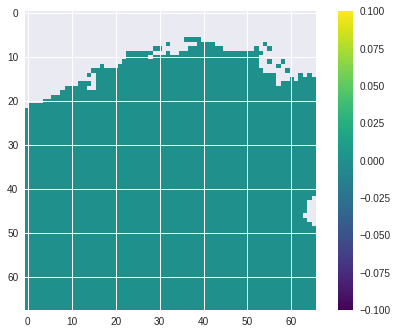

()

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/Precipitation/CHIRPS/P_CHIRPS.v2.0_mm-day-1_daily_2009.07.03.tif")


### 1.2 GEOS

The GEOS collect function can be used to collect daily or 3-hourly weather data between December 2017 and now globally. The following variables can be downloaded:

1. t2m  =  2m Air Temperature
2. u2m = 2m Eastward wind
3. v2m = 2m Northward wind
4. qv2m = 2m Specific Humidity
5. tqv = Total Precipitable Water Vapor
6. ps = Surface Pressure
7. slp = Sea Level Pressure

Lets run the daily code to collect all the possible weather data variables for the Nile Delta for 2018-07-03 till 2018-07-05 (here we take another time period, because for the sample period the data is not available). The bounding box of the Nile Delta is between the latitudes 28.5N and 31.9N and the longitudes are between 29.2E and 32.5E. 

The required inputs in order to run this function are:
1. output folder, in which the end product will be stored as a tiff file and in the WGS84 projection. 
2. Define the variables that has to be collected like an Array inlcuding strings: ["t2m", "u2m"]
3. Startdate as a string in the following format: "yyyy-mm-dd"
4. Enddate as a string in the following format: "yyyy-mm-dd"
5. Latitude Limits as an array with the following format: [Ymin, Ymax]
6. Longitude Limits as an array with the following format: [Xmin, Xmax]

In order to run the daily function for the mentioned time and space, the following command can be applied:

In [ ]:
pyWAPOR.Collect.GEOS.daily(r"/content/sample_data/RAW", ["t2m", "u2m", "v2m", "qv2m", "tqv", "ps", "slp"], "2018-07-03", "2018-07-05", [28.5, 31.9], [29.2, 32.5])


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete


**Show daily GEOS data:**
1. Air Temperature
2. Eastward wind component
3. Northward wind component
4. Sea Level Air Pressure
5. Specific Humidity
6. Surface Air Pressure
7. Total Precipitable Water Vapor

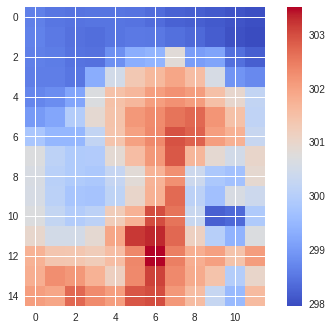

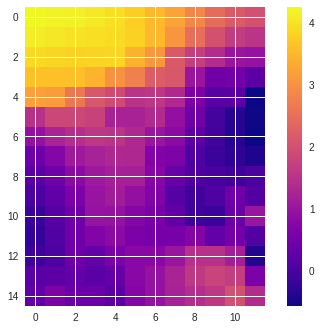

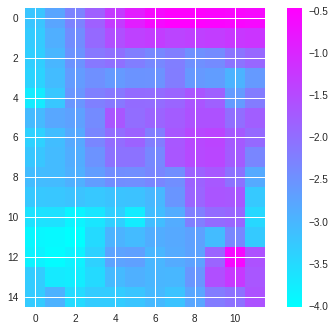

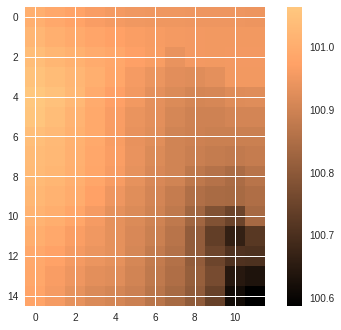

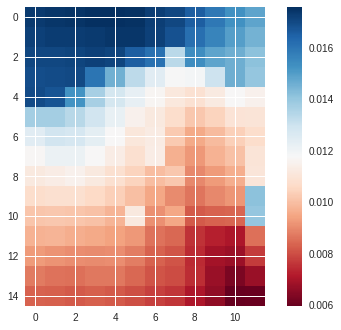

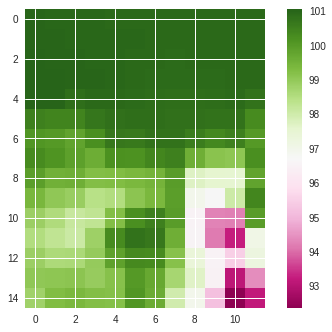

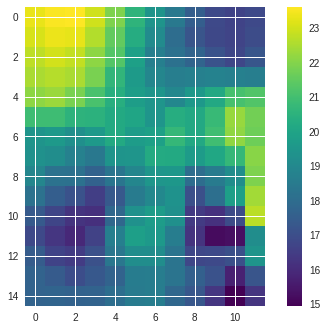

()

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/GEOS/Air_Temperature/daily/t2m_GEOS_K_daily_2018.07.03.tif", None, "coolwarm")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/GEOS/Eastward_Wind/daily/u2m_GEOS_m-s-1_daily_2018.07.03.tif", None, "plasma")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/GEOS/Northward_Wind/daily/v2m_GEOS_m-s-1_daily_2018.07.03.tif", None, "cool")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/GEOS/Sea_Level_Pressure/daily/slp_GEOS_kpa_daily_2018.07.03.tif", None, "copper")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/GEOS/Specific_Humidity/daily/qv2m_GEOS_kg-kg-1_daily_2018.07.03.tif", None, "RdBu")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/GEOS/Surface_Pressure/daily/ps_GEOS_kpa_daily_2018.07.03.tif", None, "PiYG")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/GEOS/Total_Precipitable_Water_Vapor/daily/tqv_GEOS_mm_daily_2018.07.03.tif")

For the 3-hourly function the user need to specify one more parameter, namely the periods that needs to be collected. It is optional, if no period is filled in, all the periods will be downloaded. The period is defined as the 7th parameter and is a value between 1 and 8 in which period 1 means time between 00:00 and 03:00, period 2 means period between 03:00 and 06:00, etc..

7. Period defined as an Array: [1, 2, 3, 4, 5, 6, 7, 8,]

In order to run the 3-hourly function for the mentioned date and for time period 4 and 5 (means time between 09:00 till 12:00 and 12:00 till 15:00) and space, the following command can be applied:

In [ ]:
pyWAPOR.Collect.GEOS.three_hourly(r"/content/sample_data/RAW", ["t2m", "u2m", "v2m", "qv2m", "tqv", "ps", "slp"], "2018-07-03", "2018-07-05", [28.5, 31.9], [29.2, 32.5], [4, 5])

**Show 3 hourly GEOS data:**
1. Air Temperature
2. Eastward wind component
3. Northward wind component
4. Sea Level Air Pressure
5. Specific Humidity
6. Surface Air Pressure
7. Total Precipitable Water Vapor

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/GEOS/Air_Temperature/three_hourly/t2m_GEOS_K_3-hourly_2018.07.03_H09.M00.tif", None, "coolwarm")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/GEOS/Eastward_Wind/three_hourly/u2m_GEOS_m-s-1_3-hourly_2018.07.03_H09.M00.tif", None, "plasma")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/GEOS/Northward_Wind/three_hourly/v2m_GEOS_m-s-1_3-hourly_2018.07.03_H09.M00.tif", None, "cool")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/GEOS/Sea_Level_Pressure/three_hourly/slp_GEOS_kpa_3-hourly_2018.07.03_H09.M00.tif", None, "copper")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/GEOS/Specific_Humidity/three_hourly/qv2m_GEOS_kg-kg-1_3-hourly_2018.07.03_H09.M00.tif", None, "RdBu")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/GEOS/Surface_Pressure/three_hourly/ps_GEOS_kpa_3-hourly_2018.07.03_H09.M00.tif", None, "PiYG")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/GEOS/Total_Precipitable_Water_Vapor/three_hourly/tqv_GEOS_mm_3-hourly_2018.07.03_H09.M00.tif")

### 1.3 GlobCover

The Globcover is a static map giving the land use type of the globe. The downloaded version of Globcover is V2.3. Because this map is static, no time period has to be defined.

The required inputs in order to run this function are:
1. output folder, in which the end product will be stored as a tiff file and in the WGS84 projection. 
2. Latitude Limits as an array with the following format: [Ymin, Ymax]
3. Longitude Limits as an array with the following format: [Xmin, Xmax]

The following code can download the GlobCover map for the defined area:

In [ ]:
pyWAPOR.Collect.Globcover.Landuse(r"/content/sample_data/RAW", [28.5, 31.9], [29.2, 32.5])

**Show GlobCover data:**

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/GlobCover/Landuse/LC_GLOBCOVER_V2.3.tif", None, "Set3")

### 1.4 MCD43

The MCD43A3 is a daily combined MODIS product based on the AQUA and TERRA MODIS satellites. Two parameters are used to calculate the surface albedo, namely the diffuce [Albedo_WSA_shortwave] and direct [Albedo_BSA_shortwave] term. The daily surface albedo is calculated by: ALBEDO = 0.3 * Diffuse + 0.7 * Direct. The data is globally available for the period: 2000-02-24 till now.  For the MCD43 data the NASA account is required.

The required inputs in order to run this function are:
1. output folder, in which the end product will be stored as a tiff file and in the WGS84 projection. 
2. Startdate as a string in the following format: "yyyy-mm-dd"
3. Enddate as a string in the following format: "yyyy-mm-dd"
4. Latitude Limits as an array with the following format: [Ymin, Ymax]
5. Longitude Limits as an array with the following format: [Xmin, Xmax]
6. username of your NASA account
7. password of your NASA account

In order to run the function for the Nile Delta for the sample period, the following command can be applied:


In [ ]:
pyWAPOR.Collect.MCD43.ALBEDO(r"/content/sample_data/RAW", "2009-07-03", "2009-07-05", [28.5, 31.9], [29.2, 32.5], username, password)

**Show ALBEDO data:**

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MODIS/MCD43/Albedo_MCD43A3_-_daily_2009.07.03.tif", None, "Greys")

### 1.5 MERRA

From the MERRA database the weather data can also be collected for the period before the GEOS era. Within this functions there are 5 different functions:
The MERRA dataset (available between 1st of July till 31th December 2015):
1. three_hourly
2. daily

The MERRA2 dataset (available between 1980 till now):
3. hourly_MERRA2
4. daily_MERRA2

Functions to calculate the yearly amplitude using MERRA (NOTE: for years after 2015, the year 2015 is used to get the amplitude because of the period that is covered within the MERRA database. It is possible to get the amplitude from the MERRA2 database, but because this is not collected from an OpenDAP system but single NetCDF files that includes many variables, this might take to long):
5. yearly_T_Amplitude

The MERRA dataset is collected from an OpenDAP system, which makes it faster to collect the datasets. Therefor this dataset is preferred to use to run the ETLook model. For the MERRA2 data the NASA account is required.

For the MERRA and MERRA2 the following paramters can be downloaded:
1. t2m  =  2m Air Temperature
2. u2m = 2m Eastward wind
3. v2m = 2m Northward wind
4. q2m = 2m Specific Humidity
5. tpw = Total Precipitable Water Vapor
6. ps = Surface Pressure
7. slp = Sea Level Pressure
8. swgnet = Surface Net Downward Shortwave Flux

For the MERRA daily functions the following parameters have to be defined:
1. output folder, in which the end product will be stored as a tiff file and in the WGS84 projection. 
2. Define the variables that has to be collected like an Array inlcuding strings: ["t2m", "u2m"]
3. Startdate as a string in the following format: "yyyy-mm-dd"
4. Enddate as a string in the following format: "yyyy-mm-dd"
5. Latitude Limits as an array with the following format: [Ymin, Ymax]
6. Longitude Limits as an array with the following format: [Xmin, Xmax]

To run the code for our area and time period to get all the possible weather input on daily basis, the following function can be used:. 

In [ ]:
pyWAPOR.Collect.MERRA.daily(r"/content/sample_data/RAW", ["t2m", "u2m", "v2m", "q2m", "tpw", "ps", "slp", "swgnet"], "2009-07-03", "2009-07-05", [28.5, 31.9], [29.2, 32.5])

**Show daily MERRA data:**
1. Air Temperature
2. Eastward wind component
3. Northward wind component
4. Sea Level Air Pressure
5. Specific Humidity
6. Surface Air Pressure
7. Total Precipitable Water Vapor
8. Surface Net Downward Shortwave Flux

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Air_Temperature/daily/t2m_MERRA_K_daily_2009.07.03.tif", None, "coolwarm")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Eastward_Wind/daily/u2m_MERRA_m-s-1_daily_2009.07.03.tif", None, "plasma")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Northward_Wind/daily/v2m_MERRA_m-s-1_daily_2009.07.03.tif", None, "cool")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Sea_Level_Pressure/daily/slp_MERRA_kpa_daily_2009.07.03.tif", None, "copper")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Specific_Humidity/daily/q2m_MERRA_kg-kg-1_daily_2009.07.03.tif", None, "RdBu")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Surface_Pressure/daily/ps_MERRA_kpa_daily_2009.07.03.tif", None, "PiYG")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Total_Precipitable_Water_Vapor/daily/tpw_MERRA_mm_daily_2009.07.03.tif")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Surface_Net_Downward_Shortwave_Flux/daily/swgnet_MERRA_W-m-2_daily_2009.07.03.tif")

One more input is required for the three_hourly function, and that is just like the GEOS three_hourly function the period. Also here it is an optional parameter and if not defined, all the periods will be downloaded. The period is defined as the 7th parameter and is a value between 1 and 8 in which period 1 means time between 00:00 and 03:00, period 2 means period between 03:00 and 06:00, etc..

Period defined as an Array: [1, 2, 3, 4, 5, 6, 7, 8,]

In order to run the 3-hourly function for the mentioned date and for time period 4 and 5 (means time between 09:00 till 12:00 and 12:00 till 15:00) and space, the following command can be applied:

In [ ]:
pyWAPOR.Collect.MERRA.three_hourly(r"/content/sample_data/RAW", ["t2m", "u2m", "v2m", "q2m", "tpw", "ps", "slp", "swgnet"], "2009-07-03", "2009-07-05", [28.5, 31.9], [29.2, 32.5], [4, 5])

**Show 3 hourly MERRA data:**
1. Air Temperature
2. Eastward wind component
3. Northward wind component
4. Sea Level Air Pressure
5. Specific Humidity
6. Surface Air Pressure
7. Total Precipitable Water Vapor
8. Surface Net Downward Shortwave Flux

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Air_Temperature/three_hourly/t2m_MERRA_K_3-hourly_2009.07.03_H09.M00.tif", None, "coolwarm")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Eastward_Wind/three_hourly/u2m_MERRA_m-s-1_3-hourly_2009.07.03_H09.M00.tif", None, "plasma")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Northward_Wind/three_hourly/v2m_MERRA_m-s-1_3-hourly_2009.07.03_H09.M00.tif", None, "cool")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Sea_Level_Pressure/three_hourly/slp_MERRA_kpa_3-hourly_2009.07.03_H09.M00.tif", None, "copper")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Specific_Humidity/three_hourly/q2m_MERRA_kg-kg-1_3-hourly_2009.07.03_H09.M00.tif", None, "RdBu")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Surface_Pressure/three_hourly/ps_MERRA_kpa_3-hourly_2009.07.03_H09.M00.tif", None, "PiYG")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Total_Precipitable_Water_Vapor/three_hourly/tpw_MERRA_mm_3-hourly_2009.07.03_H09.M00.tif")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Surface_Net_Downward_Shortwave_Flux/three_hourly/swgnet_MERRA_W-m-2_3-hourly_2009.07.03_H09.M00.tif", None, "gist_heat")

To download the yearly temperature amplitude using the MERRA dataset, the following input parameters are required:

1. output folder, in which the end product will be stored as a tiff file and in the WGS84 projection. 
2. Years defined as an Array: [2009, 2010]
3. Latitude Limits as an array with the following format: [Ymin, Ymax]
4. Longitude Limits as an array with the following format: [Xmin, Xmax]

The following function can be used to get the yearly temperature amplitude for the Nile Delta for 2009:

In [ ]:
pyWAPOR.Collect.MERRA.yearly_T_Amplitude(r"/content/sample_data/RAW", [2009], [28.5, 31.9], [29.2, 32.5])

**Show yearly air Temperature based on MERRA data:**

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Temperature_Amplitude/yearly/Tamp_MERRA_K_yearly_2009.01.01.tif", None, "coolwarm")

With the MERRA2 functions, the same parameters as the MERRA functions can be collected. For those functions a NASA account is required. The data is available since 1981 till now. The function itself is a bit slower compared to the MERRA functions, therefor the MERRA functions is prefered, but this dataset ends in 2016.

For the daily collect functions the following parameters are required:
1. output folder, in which the end product will be stored as a tiff file and in the WGS84 projection. 
2. Define the variables that has to be collected like an Array inlcuding strings: ["t2m", "u2m"]
3. Startdate as a string in the following format: "yyyy-mm-dd"
4. Enddate as a string in the following format: "yyyy-mm-dd"
5. Latitude Limits as an array with the following format: [Ymin, Ymax]
6. Longitude Limits as an array with the following format: [Xmin, Xmax]
7. username of your NASA account
8. password of your NASA account

To run the code for our area and time period to get all the possible weather input on daily basis, the following function can be used:



In [ ]:
pyWAPOR.Collect.MERRA.daily_MERRA2(r"/content/sample_data/RAW", ["t2m", "u2m", "v2m", "q2m", "tpw", "ps", "slp", "swgnet"], "2018-07-03", "2018-07-05", [28.5, 31.9], [29.2, 32.5], username, password)

**Show daily MERRA2 data:**
1. Air Temperature
2. Eastward wind component
3. Northward wind component
4. Sea Level Air Pressure
5. Specific Humidity
6. Surface Air Pressure
7. Total Precipitable Water Vapor
8. Surface Net Downward Shortwave Flux

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Air_Temperature/daily_MERRA2/t2m_MERRA_K_daily_2018.07.03.tif", None, "coolwarm")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Eastward_Wind/daily_MERRA2/u2m_MERRA_m-s-1_daily_2018.07.03.tif", None, "plasma")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Northward_Wind/daily_MERRA2/v2m_MERRA_m-s-1_daily_2018.07.03.tif", None, "cool")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Sea_Level_Pressure/daily_MERRA2/slp_MERRA_kpa_daily_2018.07.03.tif", None, "copper")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Specific_Humidity/daily_MERRA2/q2m_MERRA_kg-kg-1_daily_2018.07.03.tif", None, "RdBu")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Surface_Pressure/daily_MERRA2/ps_MERRA_kpa_daily_2018.07.03.tif", None, "PiYG")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Total_Precipitable_Water_Vapor/daily_MERRA2/tpw_MERRA_mm_daily_2018.07.03.tif")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Surface_Net_Downward_Shortwave_Flux/daily_MERRA2/swgnet_MERRA_W-m-2_daily_2018.07.03.tif")

For the hourly_MERRA2 function there is one additional parameter that can be defined and that is the period. In here the periods are hourly. So period 1 correspond with the time between 00:00 till 01:00, etc... 
If this parameters is not defined, all the 24 periods will be downloaded.

In order to run the hourly_MERRA2 function to collect hourly weather data for the mentioned date and for time period 10, 11 and 12 (means time between 09:00 till 10:00, 10:00 till 11:00, and 11:00 till 12:00) and space, the following command can be applied: 

In [ ]:
pyWAPOR.Collect.MERRA.hourly_MERRA2(r"/content/sample_data/RAW", ["t2m", "u2m", "v2m", "q2m", "tpw", "ps", "slp", "swgnet"], "2018-07-03", "2018-07-05", [28.5, 31.9], [29.2, 32.5], [10, 11, 12], username, password)

**Show hourly MERRA2 data:**
1. Air Temperature
2. Eastward wind component
3. Northward wind component
4. Sea Level Air Pressure
5. Specific Humidity
6. Surface Air Pressure
7. Total Precipitable Water Vapor
8. Surface Net Downward Shortwave Flux

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Air_Temperature/hourly_MERRA2/t2m_MERRA_K_hourly_2018.07.03_H11.M00.tif", None, "coolwarm")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Eastward_Wind/hourly_MERRA2/u2m_MERRA_m-s-1_hourly_2018.07.03_H11.M00.tif", None, "plasma")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Northward_Wind/hourly_MERRA2/v2m_MERRA_m-s-1_hourly_2018.07.03_H11.M00.tif", None, "cool")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Sea_Level_Pressure/hourly_MERRA2/slp_MERRA_kpa_hourly_2018.07.03_H11.M00.tif", None, "copper")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Specific_Humidity/hourly_MERRA2/q2m_MERRA_kg-kg-1_hourly_2018.07.03_H11.M00.tif", None, "RdBu")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Surface_Pressure/hourly_MERRA2/ps_MERRA_kpa_hourly_2018.07.03_H11.M00.tif", None, "PiYG")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Total_Precipitable_Water_Vapor/hourly_MERRA2/tpw_MERRA_mm_hourly_2018.07.03_H11.M00.tif")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MERRA/Surface_Net_Downward_Shortwave_Flux/hourly_MERRA2/swgnet_MERRA_W-m-2_hourly_2018.07.03_H11.M00.tif")

### 1.6 MOD11

The MOD11 is a daily  MODIS product observed by the TERRA MODIS satellites. The dataset consists of Land Surface Temperature data (LST) in Kelvin. The cloud pixels are replaced by "No Data Values". The data is globally available for the period: 2000-02-24 till now.  For the MOD11 data the NASA account is required.

The required inputs in order to run this function are:
1. output folder, in which the end product will be stored as a tiff file and in the WGS84 projection. 
2. Startdate as a string in the following format: "yyyy-mm-dd"
3. Enddate as a string in the following format: "yyyy-mm-dd"
4. Latitude Limits as an array with the following format: [Ymin, Ymax]
5. Longitude Limits as an array with the following format: [Xmin, Xmax]
6. username of your NASA account
7. password of your NASA account

In order to run the function for the Nile Delta for the sample period, the following command can be applied:

In [ ]:
pyWAPOR.Collect.MOD11.LST(r"/content/sample_data/RAW", "2009-07-03", "2009-07-05", [28.5, 31.9], [29.2, 32.5], username, password)

**Show LST *MOD11* data:**

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MODIS/MOD11/LST_MOD11A1_K_daily_2009.07.03.tif", None, "coolwarm")

### 1.7 MOD13

The MOD13 is the 16-daily  MODIS product observed by the TERRA MODIS satellites. The dataset consists of Normalized Difference Vegetation Index data (NDVI). The data is globally available for the period: 2000-02-24 till now.  For the MOD13 data the NASA account is required.

The required inputs in order to run this function are:
1. output folder, in which the end product will be stored as a tiff file and in the WGS84 projection. 
2. Startdate as a string in the following format: "yyyy-mm-dd"
3. Enddate as a string in the following format: "yyyy-mm-dd"
4. Latitude Limits as an array with the following format: [Ymin, Ymax]
5. Longitude Limits as an array with the following format: [Xmin, Xmax]
6. username of your NASA account
7. password of your NASA account

In order to run the function for the Nile Delta for the period between 2009-07-01 and 2009-07-17, the following command can be applied:

In [ ]:
pyWAPOR.Collect.MOD13.NDVI(r"/content/sample_data/RAW", "2009-07-01", "2009-07-17", [28.5, 31.9], [29.2, 32.5], username, password)

**Show NDVI *MOD13* data:**

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MODIS/MOD13/NDVI_MOD13Q1_-_16-daily_2009.07.12.tif", None, "Greens")

### 1.8 MSGCPP

The MSGCPP product is a product of the KNMI. IT uses the data of the Meteosat Second Generation geostationary satellite. This satellite is measuring the cloud every 15 minutes. An Cloud Physical Properties algorighm (CPP) that is developed by the KNMI is used to calculate the down welling surface flux. The data is only avalailable for the MSG disk and for the period 2017-01-01 till now.

The required inputs in order to run this function are:
1. output folder, in which the end product will be stored as a tiff file and in the WGS84 projection. 
2. Startdate as a string in the following format: "yyyy-mm-dd"
3. Enddate as a string in the following format: "yyyy-mm-dd"
4. Latitude Limits as an array with the following format: [Ymin, Ymax]
5. Longitude Limits as an array with the following format: [Xmin, Xmax]

In order to run the function for the Nile Delta for the sample period, the following command can be applied to get a tiff file of down welling surface flux every 15 minutes:


In [ ]:
pyWAPOR.Collect.MSGCPP.SDS(r"/content/sample_data/RAW", "2017-07-03", "2017-07-04", [28.5, 31.9], [29.2, 32.5])

**Show NDVI MOD13 data:**

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MSGCPP/SDS/15min/SDS_MSGCPP_W-m-2_15min_2017.07.03_H13.M15.tif", None, "inferno")

### 1.9 MYD11

The MYD11 is a daily  MODIS product observed by the AQUA MODIS satellites. The dataset consists of Land Surface Temperature data (LST) in Kelvin. The cloud pixels are replaced by "No Data Values". The data is globally available for the period: 2000-02-24 till now.  For the MYD11 data the NASA account is required.

The required inputs in order to run this function are:
1. output folder, in which the end product will be stored as a tiff file and in the WGS84 projection. 
2. Startdate as a string in the following format: "yyyy-mm-dd"
3. Enddate as a string in the following format: "yyyy-mm-dd"
4. Latitude Limits as an array with the following format: [Ymin, Ymax]
5. Longitude Limits as an array with the following format: [Xmin, Xmax]
6. username of your NASA account
7. password of your NASA account

In order to run the function for the Nile Delta for the sample period, the following command can be applied:



In [ ]:
pyWAPOR.Collect.MYD11.LST(r"/content/sample_data/RAW", "2009-07-03", "2009-07-05", [28.5, 31.9], [29.2, 32.5], username, password)

**Show LST MYD11 data:**

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/MODIS/MYD11/LST_MYD11A1_K_daily_2009.07.04.tif", None, "coolwarm")

### 1.10 MYD13
The MYD13 is the 16-daily MODIS product observed by the AQUA MODIS satellites. The dataset consists of Normalized Difference Vegetation Index data (NDVI). The data is globally available for the period: 2000-02-24 till now.  For the MYD13 data the NASA account is required.

The required inputs in order to run this function are:

output folder, in which the end product will be stored as a tiff file and in the WGS84 projection.
Startdate as a string in the following format: "yyyy-mm-dd"
Enddate as a string in the following format: "yyyy-mm-dd"
Latitude Limits as an array with the following format: [Ymin, Ymax]
Longitude Limits as an array with the following format: [Xmin, Xmax]
username of your NASA account
password of your NASA account
In order to run the function for the Nile Delta for the period between 2009-07-01 and 2009-07-17, the following command can be applied:

In [ ]:
pyWAPOR.Collect.MYD13.NDVI(r"/content/sample_data/RAW", "2009-07-01", "2009-07-17", [28.5, 31.9], [29.2, 32.5], username, password)

**Show WAPOR LandCover data:**

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/WAPOR/LandCover/LC_WAPOR_2009.01.01.tif", None, "Set3")

### 1.11 SRTM

The SRTM download the altitude information. 

The required inputs in order to run this function are:
1. output folder, in which the end product will be stored as a tiff file and in the WGS84 projection. 
2. Latitude Limits as an array with the following format: [Ymin, Ymax]
3. Longitude Limits as an array with the following format: [Xmin, Xmax]

The following code can download the DEM map for the defined area:

In [ ]:
pyWAPOR.Collect.SRTM.DEM(r"/content/sample_data/RAW", [28.5, 31.9], [29.2, 32.5])

**Show DEM SRTM data:**

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/SRTM/DEM/DEM_SRTM_m_3s.tif", None, "terrain")

### 1.12 WAPOR

The WAPOR module downloads the yearly Landcover map created within the WAPOR project.

The required inputs in order to run this function are:
1. output folder, in which the end product will be stored as a tiff file and in the WGS84 projection. 
2. Startdate as a string in the following format: "yyyy-mm-dd"
3. Enddate as a string in the following format: "yyyy-mm-dd"
4. Latitude Limits as an array with the following format: [Ymin, Ymax]
5. Longitude Limits as an array with the following format: [Xmin, Xmax]

The following code can download the LandCover map for the defined area:

In [ ]:
pyWAPOR.Collect.WAPOR.LandCover(r"/content/sample_data/RAW", "2009-01-01", "2010-12-31", [28.5, 31.9], [29.2, 32.5])


Progress: |██████████████████████████████████████████████████| 100.0% Complete


**Show WAPOR LandCover data:**

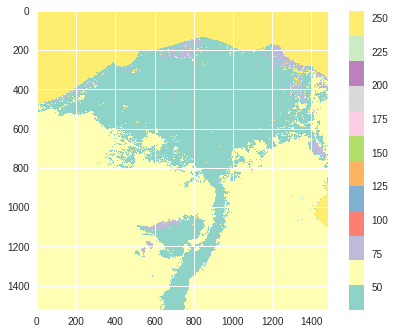

()

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/RAW/WAPOR/LandCover/LC_WAPOR_2009.01.01.tif", None, "Set3")

## 2. Processing Tool

With only the collect tools, you will not get the required datasets that are needed for the ETLook model. The collect tools only collect the RAW data and no additonal processing is done besides changing the format to tiff, reprojection to WGS84 and clip the area. 

Before running the ETLook model, all the input raster datasets needs to have the same dimensions and also some parameters still have to be calculated based on the RAW sensor input collected by the collect tools.

Therefor there are also processing tools. By running the overall processing tool, the required data for that day will be downloaded automatically if it not exists yet on the computer. The user need to give the following input in order to run the overall processing function:

1. output_folder, in which the end products will be stored as a tiff file and in the WGS84 projection. 
2. Startdate as a string in the following format: "yyyy-mm-dd"
3. Enddate as a string in the following format: "yyyy-mm-dd"
4. Latitude Limits as an array with the following format: [Ymin, Ymax]
5. Longitude Limits as an array with the following format: [Xmin, Xmax]
6. username of your NASA account
7. password of your NASA account
8. "GlobCover" or "WAPOR" (Default is "GlobCover") defines which LandCover map will be used

The function will create a folder within the user defined output folder mentioning the day. Within this folder all the pre-procesed rasters that are required for the ETLook model are located. 

>output_folder

             >ETLook_input

                    >yyyymmdd

                           ALBEDO_yyyymmdd.tif
                           Aspect.tif
                           Bulk_Stomatal_resistance.tif
                           DEM.tif
                           LandMask.tif
                           Lat_yyyymmdd.tif
                           Lon_yyyymmdd.tif
                           LST_yyyymmdd.tif
                           Maximum_Obstacle_Height.tif
                           NDVI_yyyymmdd.tif
                           Pair_24_0_yyyymmdd.tif
                           Pair_inst_0_yyyymmdd.tif
                           Pair_inst_yyyymmdd.tif
                           Precipitation_yyyymmdd.tif
                           qv_24_yyyymmdd.tif
                           qv_inst_yyyymmdd.tif
                           Slope.tif
                           tair_24_yyyymmdd.tif
                           Tair_amp_yyyymmdd.tif
                           tair_inst_yyyymmdd.tif
                           Time_yyyymmdd.tif
                           Trans_24_yyyymmdd.tif
                           wind_24_yyyymmdd.tif
                           wind_inst_yyyymmdd.tif
                           wv_inst_yyyymmdd.tif

The following code can used to create the input data for ETLook for one day for the Nile Basin:



In [ ]:
pyWAPOR.Pre_ETLook.main(r"/content/sample_data", "2009-07-03", "2009-07-03", [28.5, 31.9], [29.2, 32.5], username, password)

**Show some ETLook inputs :**

1. Tair_24
2. LST
3. NDVI
4. Albedo
5. Bulk Stomatal Resistance
6. Slope

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/ETLook_input/20090703/tair_24_20090703.tif", None, "gist_stern")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/ETLook_input/20090703/LST_20090703.tif", None, "magma")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/ETLook_input/20090703/NDVI_20090703.tif", None, "YlGn")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/ETLook_input/20090703/ALBEDO_20090703.tif", None, "gist_yarg")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/ETLook_input/20090703/Bulk_Stomatal_resistance.tif", None, "tab10")
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/ETLook_input/20090703/Slope.tif", None, "inferno")

## 3. ETLook model

The last function correspond in applying the ETLook model by using the ETLook_input folder created in step 2.

The required inputs are:

1. input_folder_ETLook corresponds to the path created by the processing tools
2. output_folder_ETLook, this folder will be created to store all the ETLook outputs
3. Date, a python datetime defining the day (can be created by using pandas or datetime module)

An example to apply the ETLook model on the folder generated in step 2 is shown below:

In [ ]:
import pandas as pd

Startdate = "2009-07-03"
Enddate = "2009-07-03"

# Create daily timesteps between start and enddate
Dates = pd.date_range(Startdate, Enddate, freq = "D")

# Loop over the dates
for Date in Dates:
    try:
        pyWAPOR.ETLook.ETLook_code.main(r"/content/sample_data/ETLook_input", r"/content/sample_data/ETLook_output", Date)
    except:
        print("ETLook not applied for %s" %Date) 

**Show ETLook outputs :**

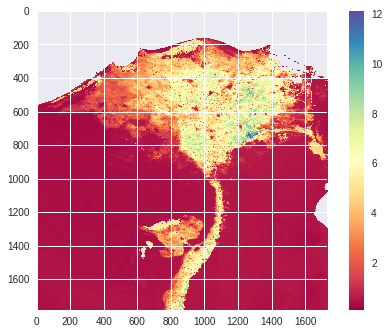

()

In [ ]:
pyWAPOR.Functions.Processing_Functions.Show_tif(r"/content/sample_data/ETLook_output/20090703/et_24_mm_20090703.tif", None, "Spectral")

## 4. Appendix

Install gdal in colab:

In [ ]:
!apt-get update

In [ ]:

!apt-get install libgdal-dev -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgdal-dev is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [ ]:

!apt-get install python-gdal -y